#Fitness Tracker Analysis Project

##Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


##Import Raw Data

In [ ]:
path = '/content/drive/MyDrive/Projects/Fitness Project/Fitness_Tracker_Data.csv'
df = pd.read_csv(path)

In [ ]:
df.head(5)

,User_ID,Date,Steps,Heart_Rate_avg,Calories_Burned,Workout_Type
0,4001,2024-01-01,14748,68,598,Cardio
1,4002,2024-01-02,8943,74,428,Cardio
2,4003,2024-01-03,14195,69,724,NaN
3,4004,2024-01-04,7963,97,284,Strength
4,4005,2024-01-05,14671,93,622,Yoga


In [ ]:
df.tail()

,User_ID,Date,Steps,Heart_Rate_avg,Calories_Burned,Workout_Type
95,4096,2024-04-05,7333,76,299,Yoga
96,4097,2024-04-06,11548,63,393,Yoga
97,4098,2024-04-07,12708,85,443,Cardio
98,4099,2024-04-08,6781,73,711,Yoga
99,4100,2024-04-09,8720,62,184,NaN


In [ ]:
print('Size of data',df.shape)

Size of data (100, 6)


##Identifying of the Missing Values
### Workout_Type has 21 missing values

In [ ]:
df.isnull().sum()

,0
User_ID,0
Date,0
Steps,0
Heart_Rate_avg,0
Calories_Burned,0
Workout_Type,21


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,User_ID,Steps,Heart_Rate_avg,Calories_Burned
count,100.000000,100.00000,100.000000,100.000000
mean,4050.500000,8455.22000,79.690000,473.640000
std,29.011492,4157.31053,10.370602,181.639588
min,4001.000000,1000.00000,61.000000,160.000000
25%,4025.750000,4855.00000,70.000000,304.500000
50%,4050.500000,8681.50000,80.000000,488.500000
75%,4075.250000,11662.00000,89.000000,623.250000
max,4100.000000,14972.00000,99.000000,795.000000


In [ ]:
df['Workout_Type'].value_counts()

,count
Workout_Type,
Yoga,27
Cardio,26
Strength,26


###Filling of the missing values in Workout_Type as 'No Workout'

In [ ]:
df['Workout_Type'] = df['Workout_Type'].fillna('No Workout')

In [ ]:
df['Workout_Type'].value_counts()

,count
Workout_Type,
Yoga,27
Cardio,26
Strength,26
No Workout,21


##Relationship Between Variables

###Pairplot

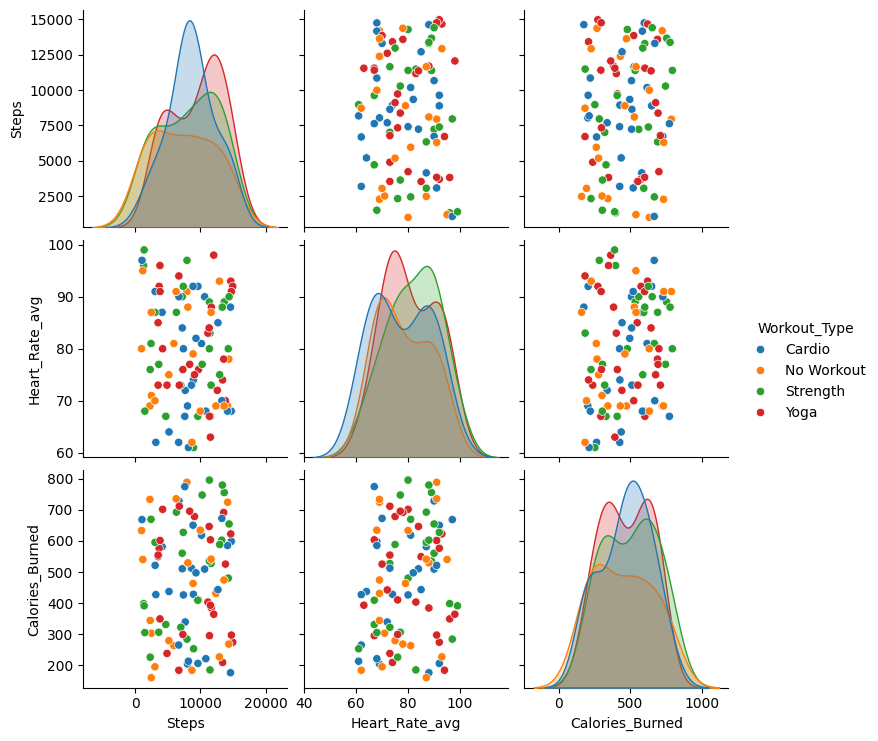

In [ ]:
sns.pairplot(df, vars=['Steps', 'Heart_Rate_avg', 'Calories_Burned'], hue='Workout_Type')
plt.show()

###Correlation Map

In [ ]:
corr_matrix = df[['Calories_Burned', 'Steps', 'Heart_Rate_avg']].corr()
print(corr_matrix)

                 Calories_Burned     Steps  Heart_Rate_avg
Calories_Burned         1.000000  0.070400        0.166198
Steps                   0.070400  1.000000       -0.066527
Heart_Rate_avg          0.166198 -0.066527        1.000000


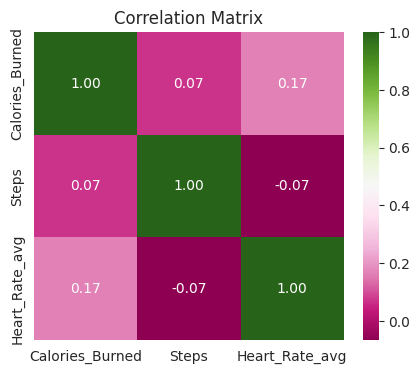

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='PiYG', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

##Calories Burned based on Workout

In [ ]:
calories_by_workout = df.groupby('Workout_Type')['Calories_Burned'].sum().reset_index().sort_values(by='Calories_Burned', ascending=False)
print(calories_by_workout)

  Workout_Type  Calories_Burned
2     Strength            13015
3         Yoga            12693
0       Cardio            12208
1   No Workout             9448


/tmp/ipython-input-16-18839402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=calories_by_workout, x='Workout_Type', y='Calories_Burned',palette='pastel')


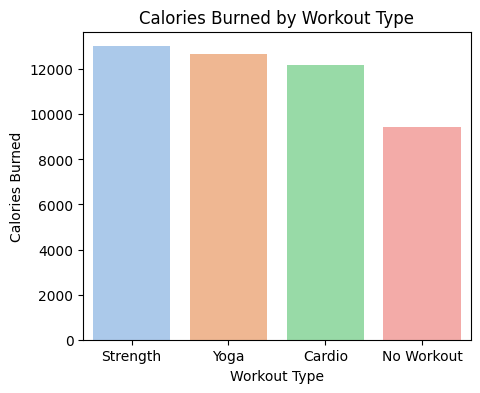

In [ ]:
plt.figure(figsize=(5,4))
sns.barplot(data=calories_by_workout, x='Workout_Type', y='Calories_Burned',palette='pastel')
plt.title('Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')
plt.show()

##Calories Burned Based on Heart Rate

In [ ]:
calories_by_heartrate = df.groupby('Heart_Rate_avg')['Calories_Burned'].sum().reset_index().sort_values(by='Heart_Rate_avg')

<Figure size 1000x600 with 0 Axes>

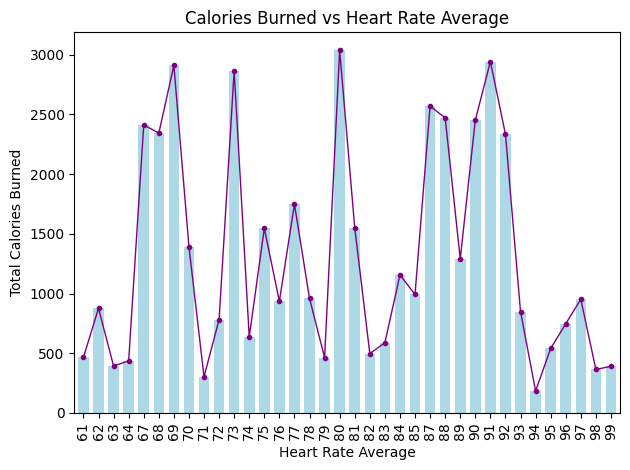

In [ ]:
plt.figure(figsize=(10,6))
calories_by_heartrate.plot(kind='bar',x='Heart_Rate_avg',y='Calories_Burned',color='lightblue',width=0.7, legend=False)

plt.plot(calories_by_heartrate.index, calories_by_heartrate['Calories_Burned'],color='purple',marker='.',linewidth=1)
plt.title('Calories Burned vs Heart Rate Average')
plt.xlabel('Heart Rate Average')
plt.ylabel('Total Calories Burned')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##Users Who have more Steps

In [ ]:
top_users = df.sort_values(by='Steps', ascending=False).head(5).reset_index(drop=True)
print(top_users[['User_ID', 'Steps']])

   User_ID  Steps
0     4038  14972
1     4067  14761
2     4001  14748
3     4005  14671
4     4014  14626


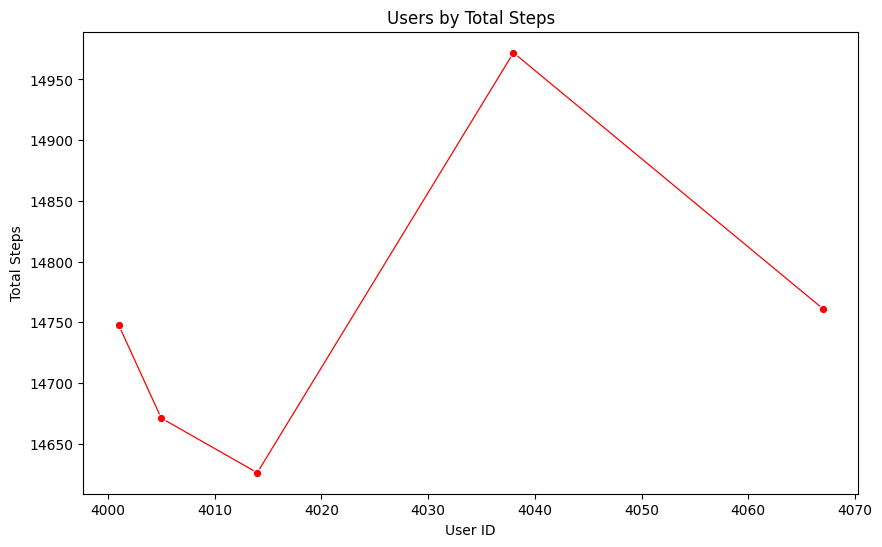

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_users, x='User_ID', y='Steps', color='red',marker='o',linewidth=0.9)

plt.title('Users by Total Steps')
plt.xlabel('User ID')
plt.ylabel('Total Steps')
plt.show()

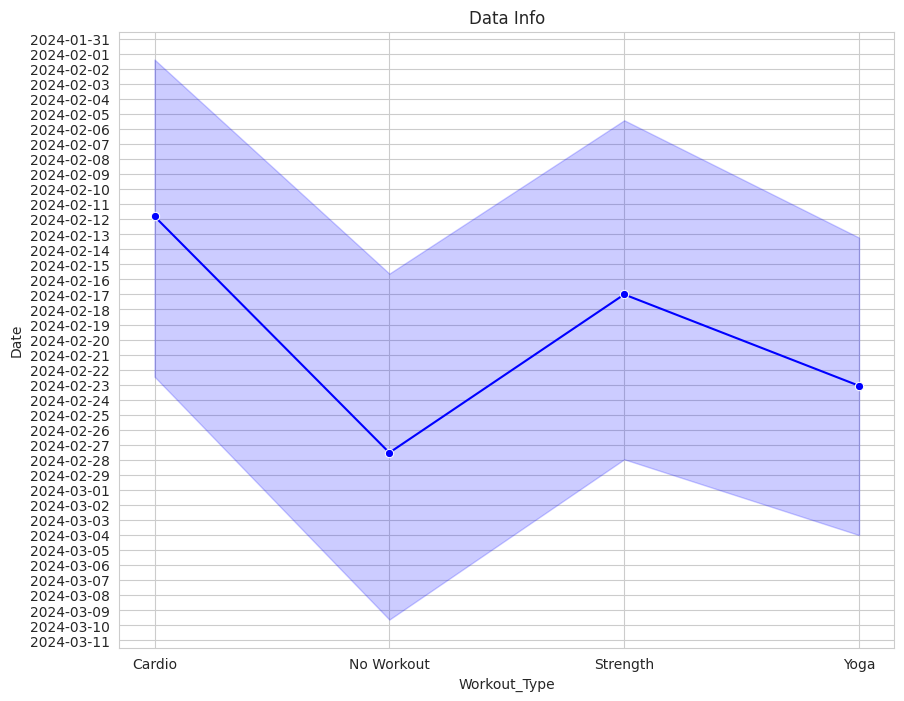

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.lineplot(x='Workout_Type',y='Date',data=df,color='blue',marker='o')
plt.title('Data Info')
plt.show()

In [ ]:
df.groupby('Workout_Type').agg({'Calories_Burned':'mean','Heart_Rate_avg':'mean','Steps':'mean'}).reset_index()

,Workout_Type,Calories_Burned,Heart_Rate_avg,Steps
0,Cardio,469.538462,77.576923,8577.269231
1,No Workout,449.904762,78.142857,7385.714286
2,Strength,500.576923,81.923077,8198.192308
3,Yoga,470.111111,80.777778,9417.037037
